In [36]:
import pandas as pd
df = pd.read_csv("evaluation_results.csv")

model_name_mapping = {
    'GPT4OMiniModel': 'gpt4o-mini',
    'GeminiModel': 'gemini-1.5-flash'
}

# Replace the model names in the DataFrame
df['model_name'] = df['model_name'].replace(model_name_mapping)

In [37]:
df.sample(5)

,model_name,pid,question,model_response,is_correct,duration,input_tokens_count,output_tokens_count
191,gpt4o-mini,228,"As shown in the figure, AB is the diameter of ...",1. **Problem:** Given that \( AB \) is the dia...,0,6.804773,8624,315
0,gemini-1.5-flash,643,"As shown in the figure, CD is the diameter of ...","1. **Problem:** In a circle with center O, dia...",0,5.657698,373,396
158,gpt4o-mini,767,What is the maximum value of y?,1. **Problem:** Find the maximum value of \( y...,1,6.139492,8584,215
176,gpt4o-mini,255,"As shown in the figure, ∠BAC = 110.0, if A and...","To solve the problem, we will analyze the give...",0,8.480424,8627,614
92,gemini-1.5-flash,737,Find the perimeter of the parallelogram.,1. **Problem:** Find the perimeter of the para...,1,2.979173,336,190


In [38]:
# Group by model_name and calculate accuracy
accuracy_df = df.groupby('model_name').agg(
    total_responses=('is_correct', 'count'),
    correct_responses=('is_correct', 'sum')
).reset_index()

# Calculate accuracy as a percentage
accuracy_df['accuracy_percentage'] = (accuracy_df['correct_responses'] / accuracy_df['total_responses']) * 100

# Print the accuracy DataFrame
print(accuracy_df[['model_name', 'accuracy_percentage']])

         model_name  accuracy_percentage
0  gemini-1.5-flash                 42.0
1        gpt4o-mini                 42.0


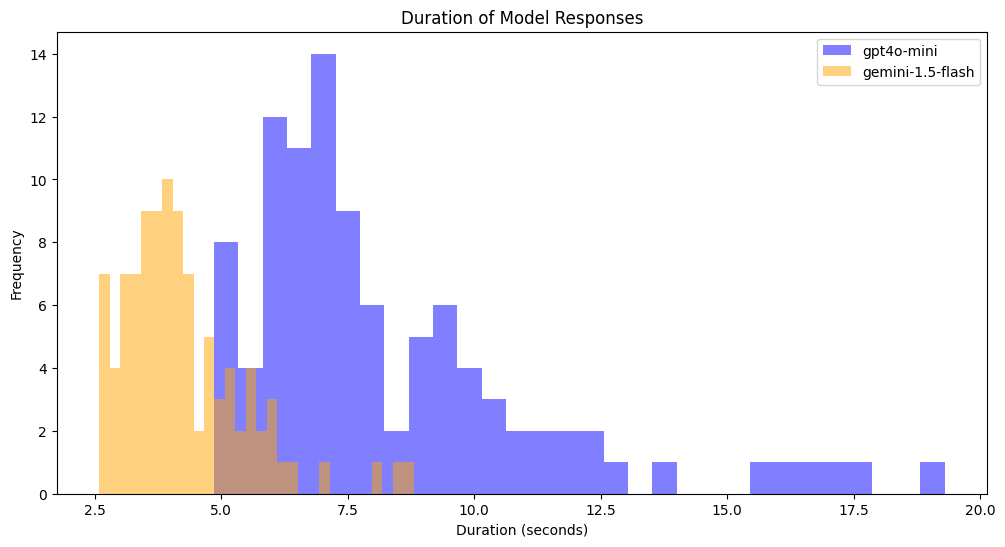

In [33]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each model
gpt4o_durations = df[df['model_name'] == 'gpt4o-mini']['duration']
gemini_durations = df[df['model_name'] == 'gemini-1.5-flash']['duration']

plt.figure(figsize=(12, 6))
plt.hist(gpt4o_durations, bins=30, alpha=0.5, label='gpt4o-mini', color='blue')
plt.hist(gemini_durations, bins=30, alpha=0.5, label='gemini-1.5-flash', color='orange')

# Add labels and title
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Duration of Model Responses')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [24]:
# Calculate price for GPT4OMiniModel
input_token_price = 0.000015 # 15 cents per million input tokens 
output_token_price = 0.00006 # 60 cents per million input tokens 

# Create a price column for GPT4OMiniModel
df.loc[df['model_name'] == 'gpt4o-mini', 'price'] = (
    df['input_tokens_count'] * input_token_price +
    df['output_tokens_count'] * output_token_price
)

In [25]:
df.sample(5)

,model_name,pid,question,model_response,is_correct,duration,input_tokens_count,output_tokens_count,price
187,gpt4o-mini,280,"In the figure above, ABCDEF is a regular hexag...",1. **Problem:** We need to find the value of \...,0,6.225992,8603,388,0.152325
42,gemini-1.5-flash,536,"As shown in the figure, points A, B, and C are...","candidates {\n content {\n role: ""model""\n...",1,2.591600,366,157,NaN
24,gemini-1.5-flash,220,"As shown in the figure, ⊙O is the circumscribe...","candidates {\n content {\n role: ""model""\n...",0,2.707905,368,189,NaN
134,gpt4o-mini,17,如图，在Rt△ABC中，∠ACB＝90°，D是AB的中点，AB＝10，则CD的长为（）,1. **Problem**: 在直角三角形 \( \triangle ABC \) 中，已...,0,19.293559,8608,566,0.163080
25,gemini-1.5-flash,947,如图，AB∥CD，BC∥DE，∠A＝45°，∠C＝110°，则∠AED的度数为（）,"candidates {\n content {\n role: ""model""\n...",0,3.960215,362,259,NaN


In [26]:
input_char_price = 0.0000125 # $0.000125 / 1k characters
output_char_price = 0.0000375 # $0.000375 / 1k characters
image_price = 0.0001315 # $0.0001315 / image

# Calculate price for GeminiModel
df.loc[df['model_name'] == 'gemini-1.5-flash', 'price'] = (
    df['question'].str.replace(r'\s+', '', regex=True).str.len() * input_char_price + # non-whitespace characters
    df['model_response'].str.replace(r'\s+', '', regex=True).str.len() * output_char_price + # non-whitespace characters
    image_price
)


In [27]:
df.sample(5)

,model_name,pid,question,model_response,is_correct,duration,input_tokens_count,output_tokens_count,price
197,gpt4o-mini,930,如图，F是△ABC的角平分线CD和BE的交点，CG⊥AB于点G．若∠ACG＝32°，则∠BF...,1. **Problem**: Given triangle \( \triangle AB...,0,8.313809,8622,502,0.159450
96,gemini-1.5-flash,990,"In $\odot S$, $m \widehat {PQR}=98$, Find $m \...","candidates {\n content {\n role: ""model""\n...",0,4.725925,353,272,0.058819
70,gemini-1.5-flash,736,如图，已知直线a∥b，直角三角形ABC中，∠C＝90°，若∠B＝58°，那么∠1﹣∠2＝（）,"candidates {\n content {\n role: ""model""\n...",0,3.835787,369,302,0.053469
93,gemini-1.5-flash,733,Square ABCD. CT: tangent to semicircle. Find t...,"candidates {\n content {\n role: ""model""\n...",0,2.746617,352,116,0.041131
58,gemini-1.5-flash,767,What is the maximum value of y?,"candidates {\n content {\n role: ""model""\n...",1,3.506329,337,198,0.050731


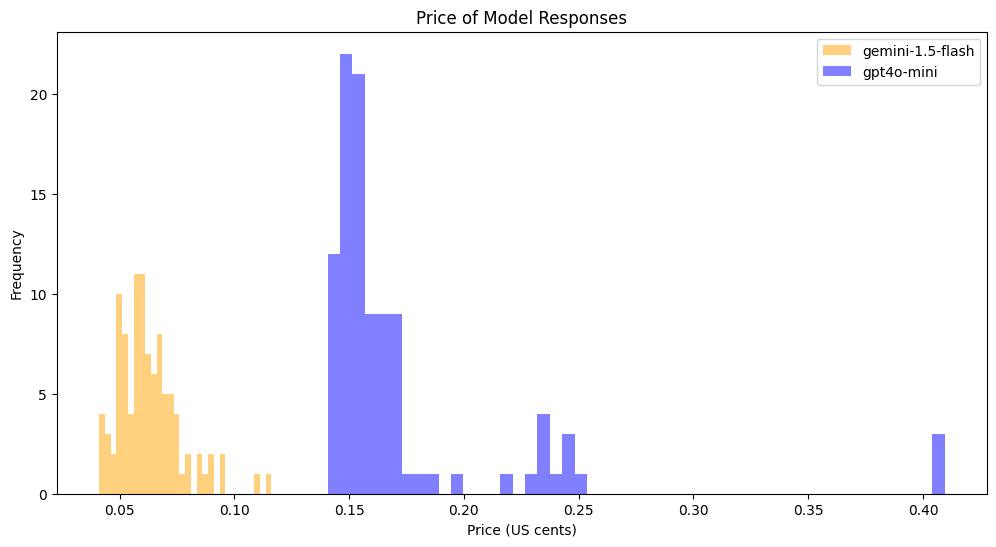

In [34]:
# Create the histogram for price
plt.figure(figsize=(12, 6))

# Filter prices for each model
gemini_prices = df[df['model_name'] == 'gemini-1.5-flash']['price']
gpt4o_prices = df[df['model_name'] == 'gpt4o-mini']['price']

# Plot histograms
plt.hist(gemini_prices.dropna(), bins=30, alpha=0.5, label='gemini-1.5-flash', color='orange')
plt.hist(gpt4o_prices.dropna(), bins=50, alpha=0.5, label='gpt4o-mini', color='blue')

# Add labels and title
plt.xlabel('Price (US cents)')
plt.ylabel('Frequency')
plt.title('Price of Model Responses')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [35]:
# Calculate average price per model
average_price_df = df.groupby('model_name').agg(
    average_price=('price', 'mean')
).reset_index()

# Print the average price DataFrame
print(average_price_df)

         model_name  average_price
0  gemini-1.5-flash       0.062977
1        gpt4o-mini       0.172368
